### Matplotlib Plotting and Data Visualization
#### Introduction to plotting

In [1]:
#importing tools
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

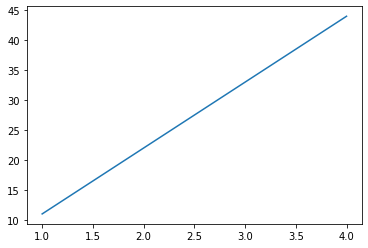

In [6]:
#how to import data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

#how to plot
plt.plot(x, y);
plt.show()


In [ ]:
#create a figure in a different way
fig = plot.figure()
ax = fig.add_subplot()
plt.show()

#or create it like this
fig.figure()
ax = fig.add_axes ([1, 1, 1, 1])
ax.plot(x, y)
plot.show()

#this method is most recommended
fig, ax = plt.subplot()
x = [1, 2, 3, 4]
y = [1, 3, 3, 4]
ax.plot(x, y);

#customize plot
ax.set(title = "Example", xlabel= "x-ample", ylabel="y-axis")

#save plot
#fig.save.fig(location)

#everytime you make a new figure, it reset the figure and plot a new set of data

#### Plotting with arrays 

In [7]:
#creating data according to samples
x = np.linspace(0, 10, 100)

#args: start, stop and num (number of samples)
#linspace returns evenly spaced number over a specified interval

x[:10]

#shows only the first 10 samples

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

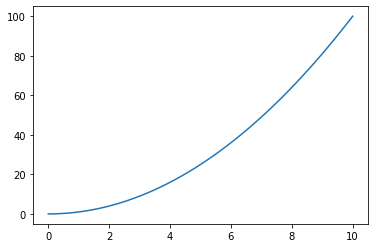

In [10]:
#making the plot
fig, ax = plt.subplots()

#giving the ax values
ax.plot(x, x**2);

#ax.plot creates a line plot

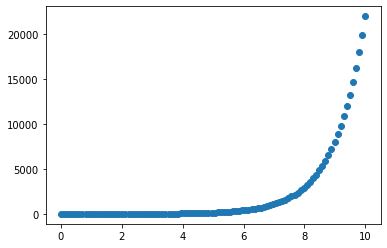

In [11]:
#making a scatterplot
#always reset fig, ax when in new cell

fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

#you can also make a wave with np.sin(x)

#### Make a plot from dictionary customizing

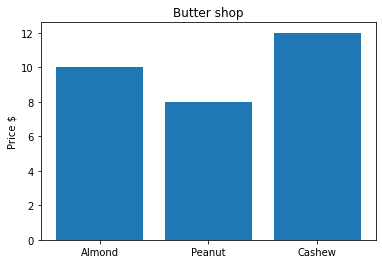

In [20]:
butter_prices = {"Almond": 10, "Peanut": 8, "Cashew": 12}
fig, ax = plt.subplots()
ax.bar(butter_prices.keys(), butter_prices.values())

#ax.bar always works in order of x and y
#if you want the names of the columns, use .keys()
#if you want the values of the DataFrame, use .values()

#You cant use x= ... as an argument and not use y=...
#You can use y=... and not x=...

#costumize plot
ax.set(title="Butter shop", ylabel="Price $");
plt.show()


#### Making side bar

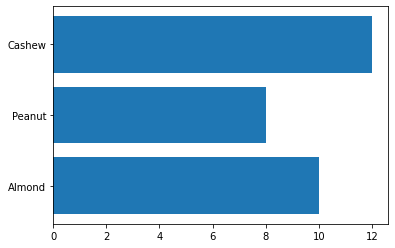

In [24]:
#making a side bar histogram
fig, ax = plt.subplots()
ax.barh(list(butter_prices.keys()), list(butter_prices.values()));
plt.show()

#you need to make them into a list in order to use them

#### Making normally random distributed histogram with array

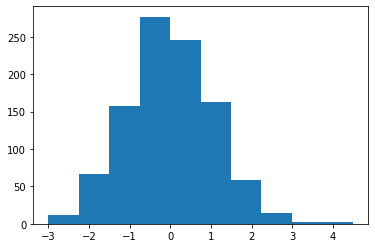

In [26]:
#making histogram from normal random array
x = np.random.randn(1000)

#creates random normally distributed data
#creates the amount of samples in the brackets ()

fig,ax = plt.subplots()
ax.hist(x);

### Two options for subplots

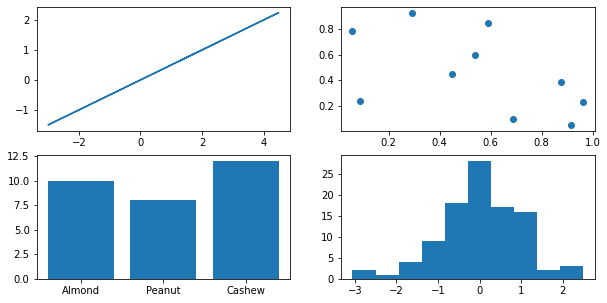

In [32]:
#option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

#creating four different figures, aligning them with ((ax1, ax2), (ax3, ax4))
#plotting them with plt.subplots()
#nrows means how many rows we want
#ncols means how many columns we want (every argument is a figure)
#making the figsize for all four figures according to args width and height (in that order)

#plot to each different axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10))
ax3.bar(butter_prices.keys(), butter_prices.values())
ax4.hist(np.random.randn(100));

#this is still 1 figure thanks to creating it with plt.SUBplots()

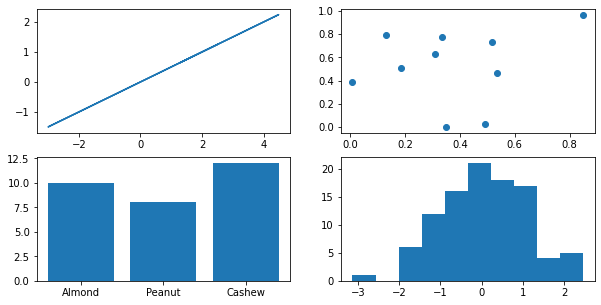

In [37]:
#option 2
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

#plot to each different index
ax[0,0].plot(x, x/2)
ax[0,1].scatter(np.random.random(10), np.random.random(10))
ax[1,0].bar(butter_prices.keys(), butter_prices.values())
ax[1,1].hist(np.random.randn(100));

### Plotting from Pandas DataFrames

In [59]:
#pandas builds on top of matplotlib

#get a dataframe
df_car_sales = pd.read_csv("7.1 car-sales.csv")

#formatting prices into ints
df_car_sales["Price"] = df_car_sales["Price"].str.replace("[\$\,\.]", "").astype(int)
df_car_sales["Price"] = df_car_sales["Price"] / 100


C:\Users\noort\AppData\Local\Temp/ipykernel_5276/244845357.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df_car_sales["Price"] = df_car_sales["Price"].str.replace("[\$\,\.]", "").astype(int)


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0


### Adding dates to the length of the datframe

In [63]:
#adding a sale date column
df_car_sales["Sale Date"] = pd.date_range("1/1/2022", periods=len(df_car_sales))

df_car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000.0,2022-01-01
1,Honda,Red,87899,4,5000.0,2022-01-02
2,Toyota,Blue,32549,3,7000.0,2022-01-03
3,BMW,Black,11179,5,22000.0,2022-01-04
4,Nissan,White,213095,4,3500.0,2022-01-05


### Making a total column (of sales)

In [67]:
df_car_sales["Total Sales"] = df_car_sales["Price"].cumsum()

df_car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000.0,2022-01-01,4000.0
1,Honda,Red,87899,4,5000.0,2022-01-02,9000.0
2,Toyota,Blue,32549,3,7000.0,2022-01-03,16000.0
3,BMW,Black,11179,5,22000.0,2022-01-04,38000.0
4,Nissan,White,213095,4,3500.0,2022-01-05,41500.0


### Plotting from DataFrame (line and scatter)

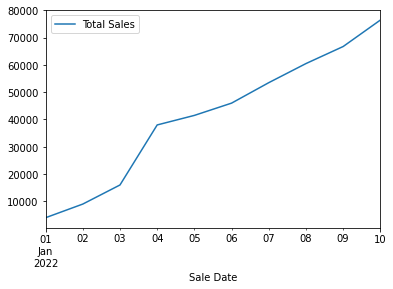

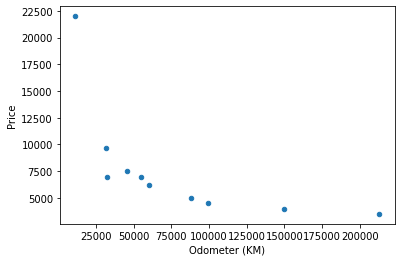

In [76]:
df_car_sales.plot(x="Sale Date", y="Total Sales");

df_car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");
# for a scatter plot y needs to be a int or float

### Plotting from Series, working with date range

<AxesSubplot:>

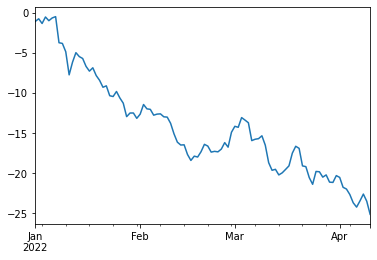

In [45]:
#taking some data from the web
ts = pd.Series(np.random.randn(100), index=pd.date_range("1/1/2022", periods=100))

#creating some random datapoint
#then assigning dates to the index (points of data) with pd.date_range starting at 1/1/2021 and going on for a 100 days

#Cumulative sum can be done with function ts.cumsum()
#the datapoints will be summed up one by one
ts = ts.cumsum()

#plotting with a series needs .plot instead of .plt
ts.plot()

### Making bar graph from grouped column

<AxesSubplot:xlabel='Make'>

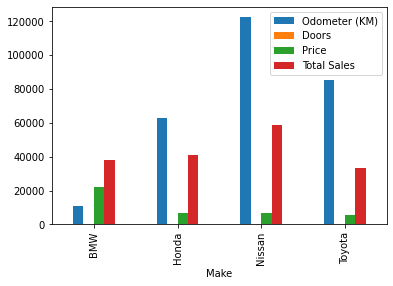

In [99]:
df_car_sales.groupby(["Make"]).mean().plot(kind="bar")



### Import file from other folder

In [105]:
heart_disease = pd.read_csv("../13.1 heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Using histograms

#### Changing the bars (detecting outliers)

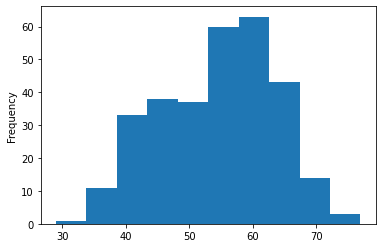

In [115]:
heart_disease["age"].plot.hist(bins=10);

#the number of bins are like the number of bars you want.
#detect the outliers by using more bins, like 100.

### Seeing all the histograms for your df

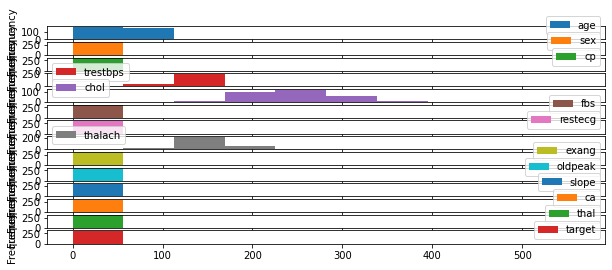

In [121]:
# seeing all the histograms
heart_disease.plot.hist(figsize=(10,4), subplots=True);

#made them higher to be able to see more
#all the data are lined up against the same values
#not ideal for what the columns vary a lot in values

### When to use Pyplot or Matplotlib

In [ ]:
#When to plot quickly: pyplot
#When plotting something more advanced: OO matplotlib method

### Changing DataFrame according to condition

In [123]:
#how to look at a specific value (patients over 50)
over_50 = heart_disease[heart_disease["age"] > 50]

len(over_50), len(heart_disease)

(208, 303)

#### Pyplot method and OO method with pyplot combined

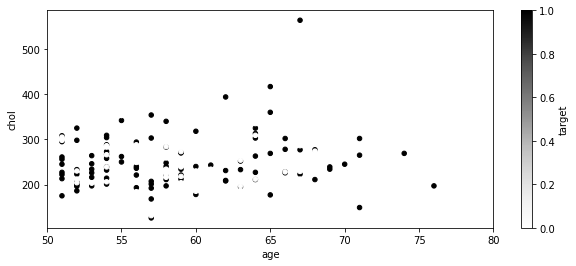

In [140]:
#pyplot method:
#using c=".." will give the figure a colour according to the column put in (in this case)
#over_50.plot(kind="scatter", x="age", y="chol", c="target");

#OO method and pyplot combined:
fig,ax = plt.subplots(figsize=(10,4))
over_50.plot(kind="scatter", x="age", y="chol", c="target", ax=ax);

#c="..." giving it a colour according to the target
#ax=ax merges the subplot and over_50 plot together, this also gives the x/y-axes a label
#the ax is the space that you are plotting inside of

#how to adjust the limit of your axis: (parameters: [start, stop])
ax.set_xlim([50, 80]);

### Advanced method (Object Orientated method)

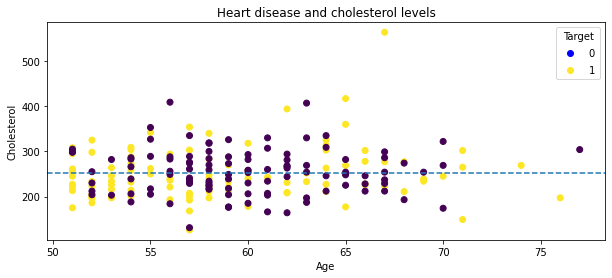

In [151]:
#More advanced method:

#Making figure
fig, ax = plt.subplots(figsize= (10, 4))

#Plot data
scatter_over_50 = ax.scatter(x=over_50["age"], y=over_50["chol"], c=over_50["target"]);

#Customize the plot
ax.set(title="Heart disease and cholesterol levels", xlabel="Age", ylabel="Cholesterol");

#add a legend
# * = unpack all the values of...
#(*type_name_dataframe.function())
leg = ax.legend(*scatter_over_50.legend_elements(), title="Target");

#changing color of legend
leg.legendHandles[0].set_color("blue")

#line representing mean
ax.axhline(over_50["chol"].mean(), linestyle="--");



### Advanced with subplots

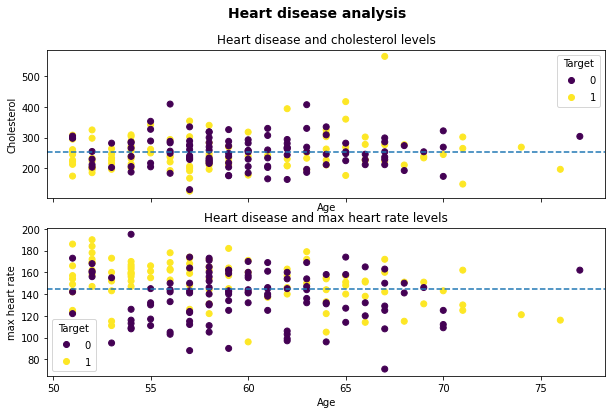

In [165]:
#adding subplots
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10,6), sharex=True)

#if the subplots share the x, you can add that in so that the x-axis is not given twice

scatter_over_50 = ax0.scatter(x=over_50["age"], y=over_50["chol"], c=over_50["target"])
ax0.set(title="Heart disease and cholesterol levels", xlabel="Age", ylabel="Cholesterol")
ax0.legend(*scatter_over_50.legend_elements(), title="Target")
ax0.axhline(over_50["chol"].mean(), linestyle="--")

thalach_over_50 = ax1.scatter(x=over_50["age"], y=over_50["thalach"], c=over_50["target"])
ax1.set(title="Heart disease and max heart rate levels", xlabel="Age", ylabel="max heart rate")
ax1.legend(*scatter_over_50.legend_elements(), title="Target")
ax1.axhline(over_50["thalach"].mean(), linestyle="--")

#add one title to the entire figure and customizing
fig.suptitle("Heart disease analysis",fontsize=14, fontweight="bold");


### Advanced method styling

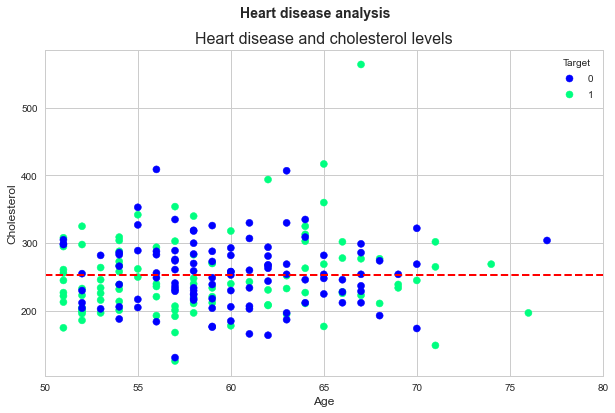

In [199]:
#Looking at different styles that are available
plt.style.available

#using one given style
#this style is than given to any fig run after it
plt.style.use("seaborn-whitegrid")

#using the same plot
fig, ax = plt.subplots(figsize=(10,6))
scatter_over_50 = ax.scatter(x=over_50["age"], y=over_50["chol"], c=over_50["target"], cmap="winter")

#adding cmap=... you van give the colors a theme

ax.set(title="Heart disease and cholesterol levels", xlabel="Age", ylabel="Cholesterol")
ax.set_xlim([50, 80])
ax.legend(*scatter_over_50.legend_elements(), title="Target")
ax.axhline(over_50["chol"].mean(), linestyle="--", c="red")
fig.suptitle("Heart disease analysis",fontsize=14, fontweight="bold");



### Saving and sharing plot

In [ ]:
#hover over image with mouse and than click on the save icon

#save it in code and with code:
#fig.savefig("give-it-a-name.png")